In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import pandas as pd

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

####################### Determine the Summary Statistics for June ##########################
#############################################################################################

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = []
june_temp = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date)=='06')

In [5]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['Date', "Temperature"])
june_temp_df

,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [6]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


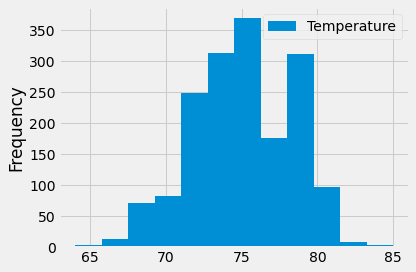

In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

june_temp_df.plot.hist(bins=12)
plt.tight_layout()

In [27]:
# Perform a query to retrieve precipitation in JUNE
june_prcp = []
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date)=='06')


# Save the query results as a Pandas DataFrame and set the index to the date column
june_prcp_df = pd.DataFrame(june_prcp, columns=['date','precipitation'])

In [22]:
june_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:>

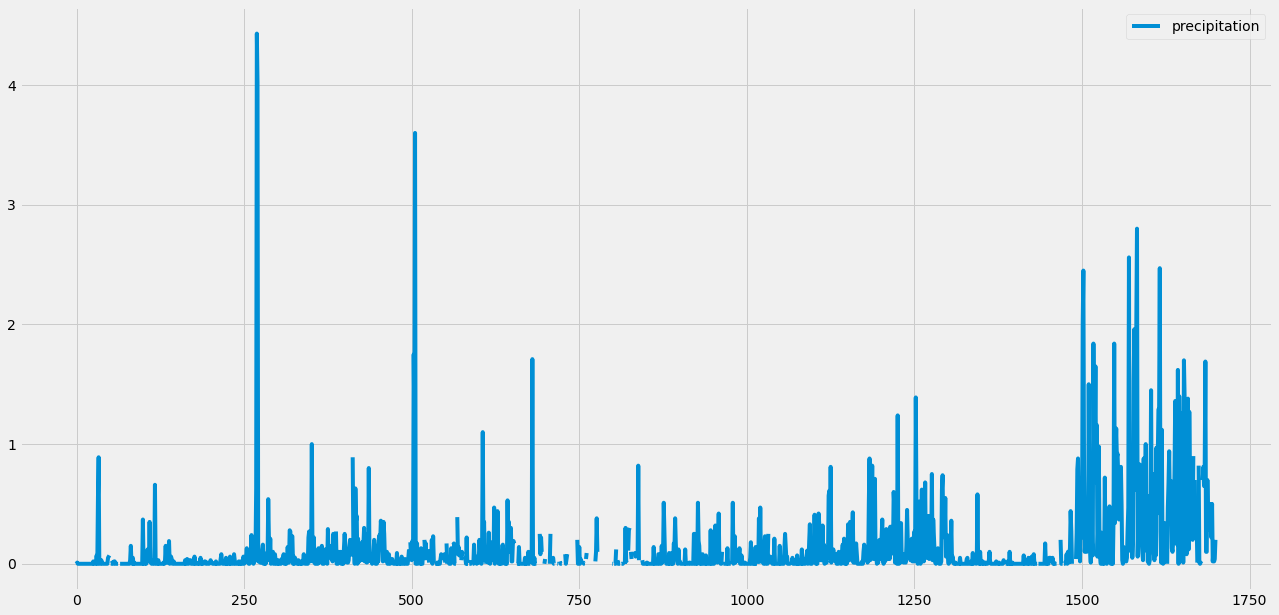

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
june_prcp_df.plot(figsize=(20,10))

################## Determine the Summary Statistics for December ############################
#############################################################################################

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = []
dec_temp = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date)=='12')

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns=['Date', "Temperature"])
dec_temp_df

,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


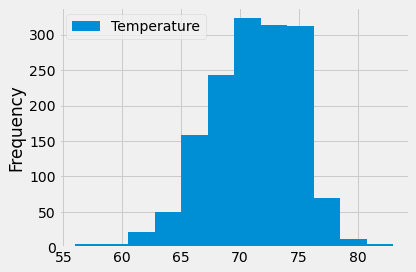

In [11]:
dec_temp_df.plot.hist(bins=12)
plt.tight_layout()

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [26]:
# Perform a query to retrieve precipitation in JUNE
dec_prcp = []
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date)=='12')


# Save the query results as a Pandas DataFrame and set the index to the date column
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['date','precipitation'])


In [24]:
dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:>

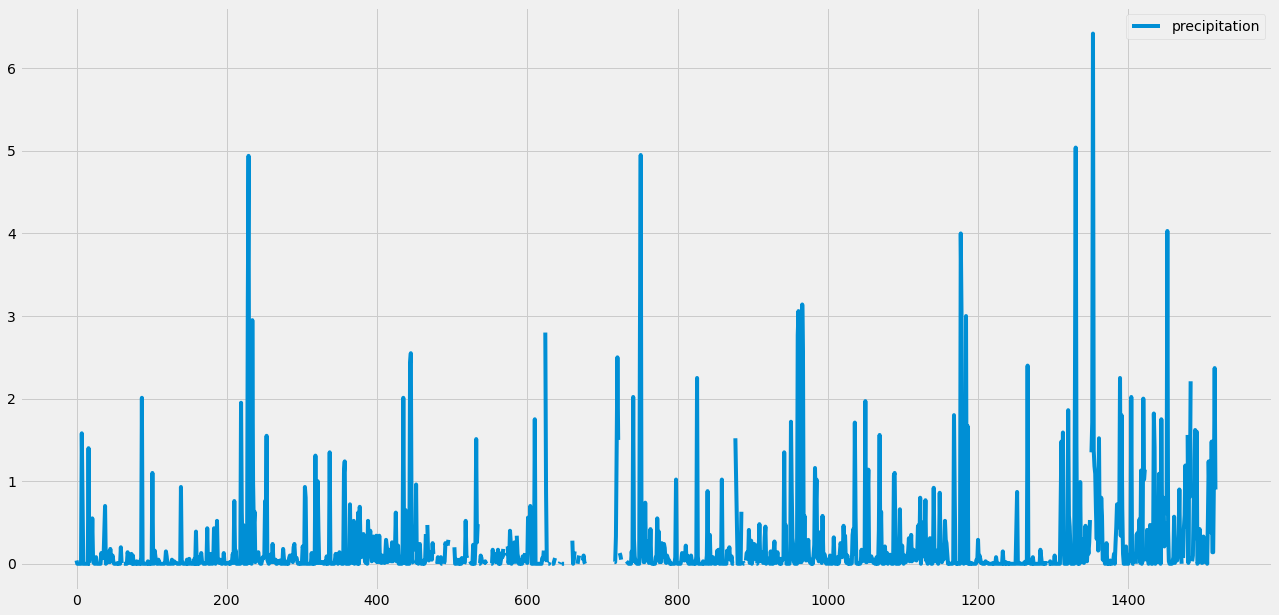

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
dec_prcp_df.plot(figsize=(20,10))